In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
from google.colab import files
uploaded = files.upload()

Saving sales_data (1).csv to sales_data (1).csv


In [2]:
df = pd.read_csv("sales_data (1).csv")

In [3]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [4]:
df.head()
df.info()
df.isnull().sum()
df.describe(include='all')
df.nunique()
df['Demand'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  object 
 1   Store ID            76000 non-null  object 
 2   Product ID          76000 non-null  object 
 3   Category            76000 non-null  object 
 4   Region              76000 non-null  object 
 5   Inventory Level     76000 non-null  int64  
 6   Units Sold          76000 non-null  int64  
 7   Units Ordered       76000 non-null  int64  
 8   Price               76000 non-null  float64
 9   Discount            76000 non-null  int64  
 10  Weather Condition   76000 non-null  object 
 11  Promotion           76000 non-null  int64  
 12  Competitor Pricing  76000 non-null  float64
 13  Seasonality         76000 non-null  object 
 14  Epidemic            76000 non-null  int64  
 15  Demand              76000 non-null  int64  
dtypes: f

,count
Demand,
88,743
102,732
100,723
103,722
90,704
...,...
296,1
286,1
325,1


In [5]:
data_dictionary = {
    "Date": "Transaction date",
    "Store ID": "Unique identifier for store",
    "Product ID": "Unique identifier for product",
    "Category": "Product category",
    "Region": "Sales region",
    "Inventory Level": "Number of items in stock",
    "Units Sold": "Items sold to customers",
    "Units Ordered": "Items ordered (customer demand)",
    "Price": "Selling price per unit",
    "Discount": "Discount rate applied (%)",
    "Weather Condition": "Weather during the transaction",
    "Promotion": "Was a promotion active? (1=yes, 0=no)",
    "Competitor Pricing": "Price of the product at competitors",
    "Seasonality": "Season of the year (e.g., Winter, Spring)",
    "Epidemic": "Epidemic present? (1=yes, 0=no)",
    "Demand": "Final demand (target variable)"
}
print("\n🔹 Data Dictionary:")
for feature, description in data_dictionary.items():
    print(f"{feature:20} : {description}")


🔹 Data Dictionary:
Date                 : Transaction date
Store ID             : Unique identifier for store
Product ID           : Unique identifier for product
Category             : Product category
Region               : Sales region
Inventory Level      : Number of items in stock
Units Sold           : Items sold to customers
Units Ordered        : Items ordered (customer demand)
Price                : Selling price per unit
Discount             : Discount rate applied (%)
Weather Condition    : Weather during the transaction
Promotion            : Was a promotion active? (1=yes, 0=no)
Competitor Pricing   : Price of the product at competitors
Seasonality          : Season of the year (e.g., Winter, Spring)
Epidemic             : Epidemic present? (1=yes, 0=no)
Demand               : Final demand (target variable)


In [6]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

In [7]:
def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower) & (dataframe[column] <= upper)]

In [8]:
outlier_columns = ['Units Sold', 'Units Ordered', 'Price', 'Discount', 'Competitor Pricing', 'Demand']
for col in outlier_columns:
    df = remove_outliers_iqr(df, col)

In [9]:
df.drop(columns=['Store ID', 'Product ID'], inplace=True)

In [10]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
categorical_cols = ['Category', 'Region', 'Weather Condition', 'Seasonality']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [11]:
df['Promotion'] = df['Promotion'].astype(int)
df['Epidemic'] = df['Epidemic'].astype(int)

In [12]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [13]:
print(f"Cleaned and encoded dataset shape: {df_encoded.shape}")

Cleaned and encoded dataset shape: (56919, 23)


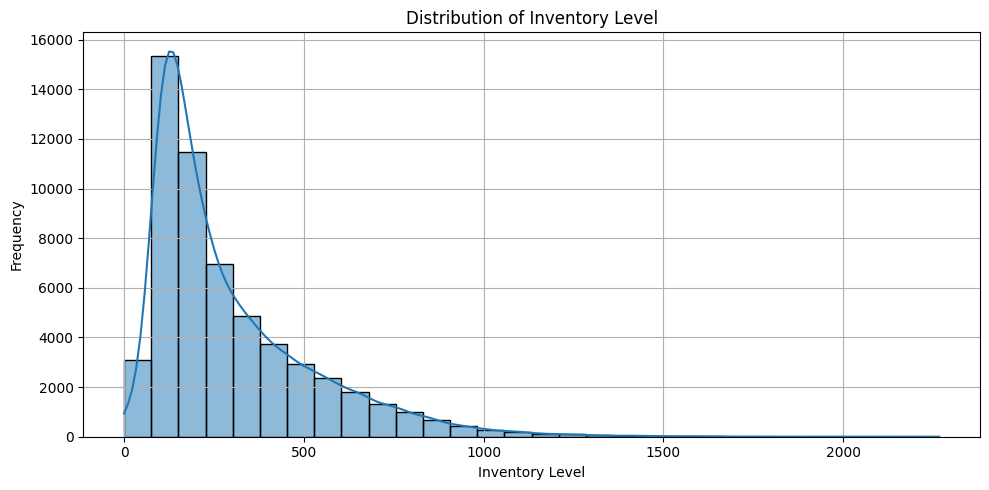

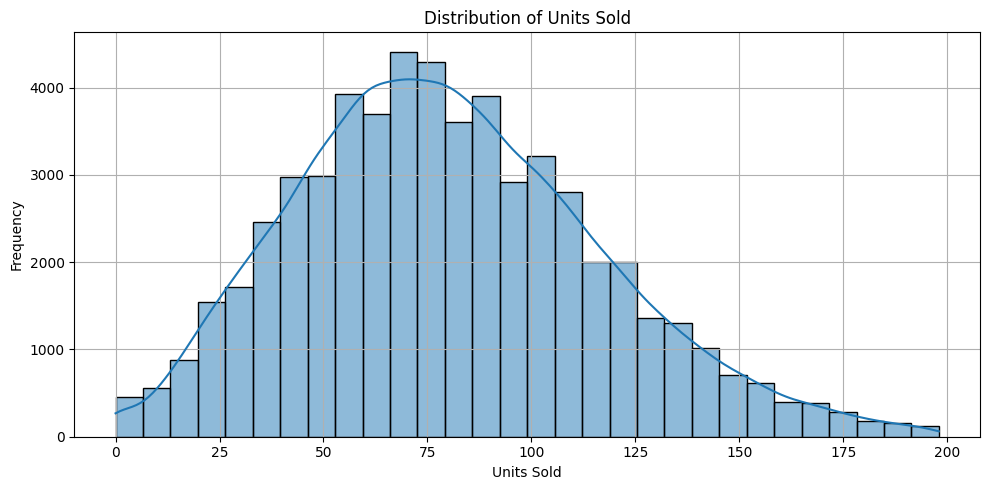

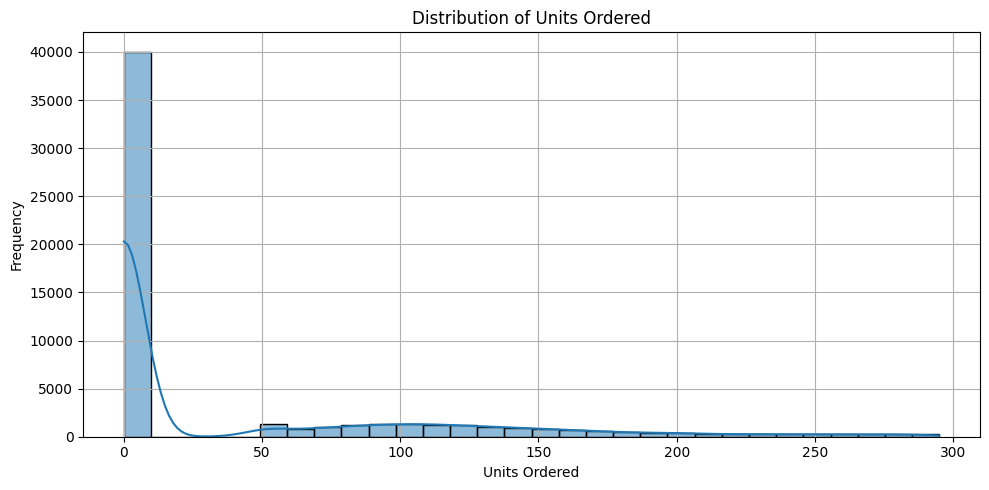

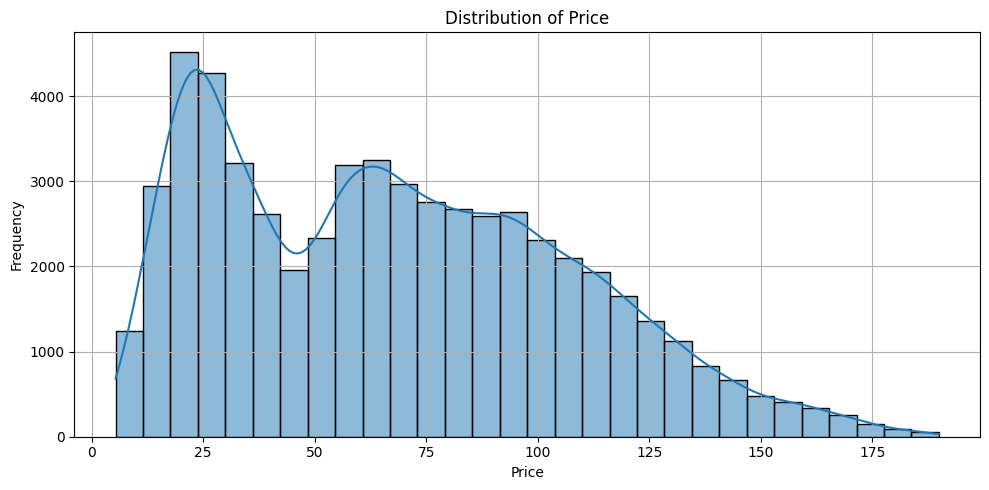

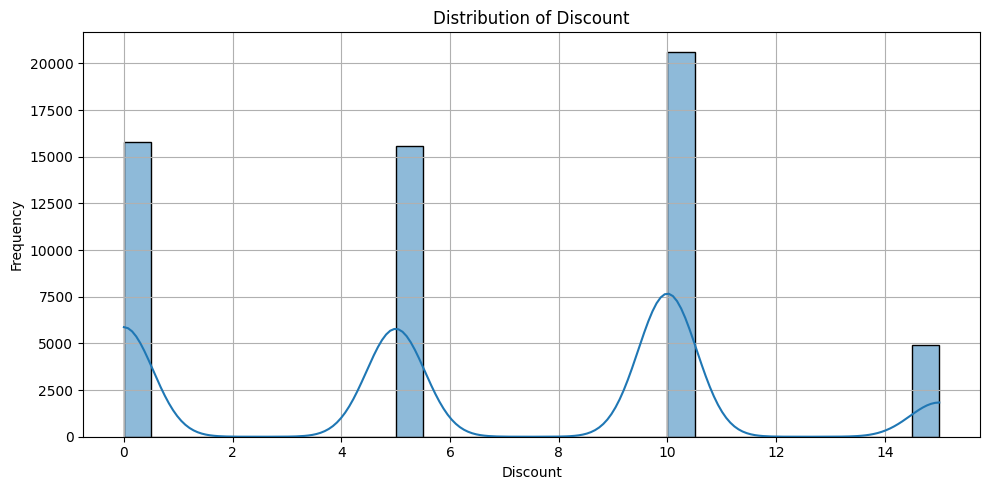

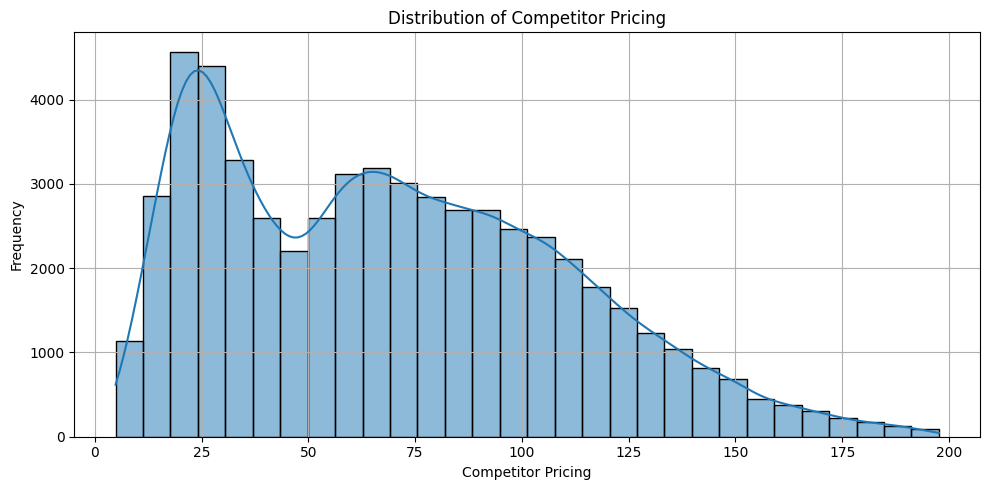

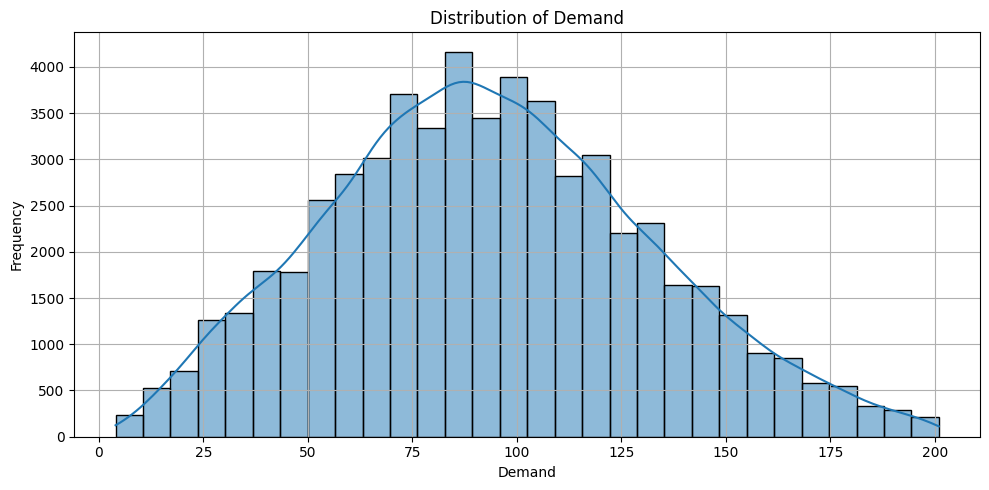

In [14]:
numerical_features = ['Inventory Level', 'Units Sold', 'Units Ordered', 'Price',
                      'Discount', 'Competitor Pricing', 'Demand']

for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_encoded[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

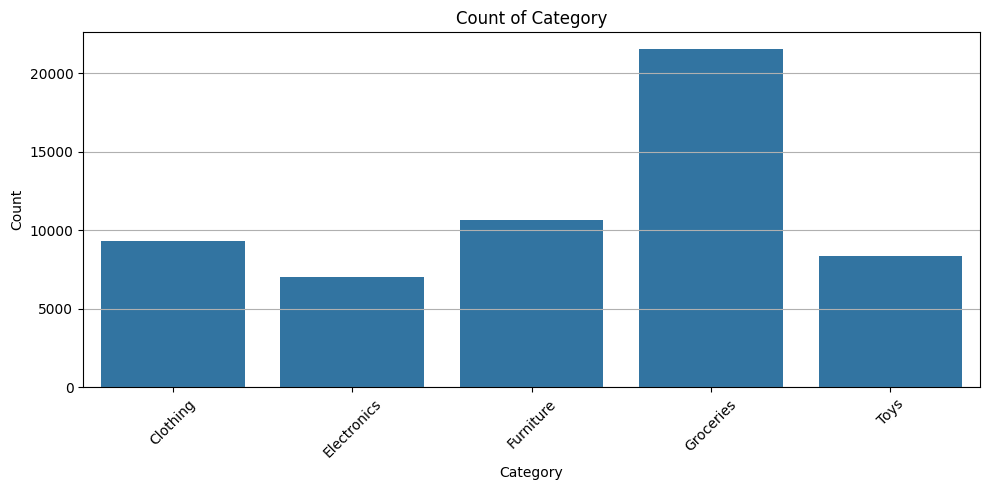

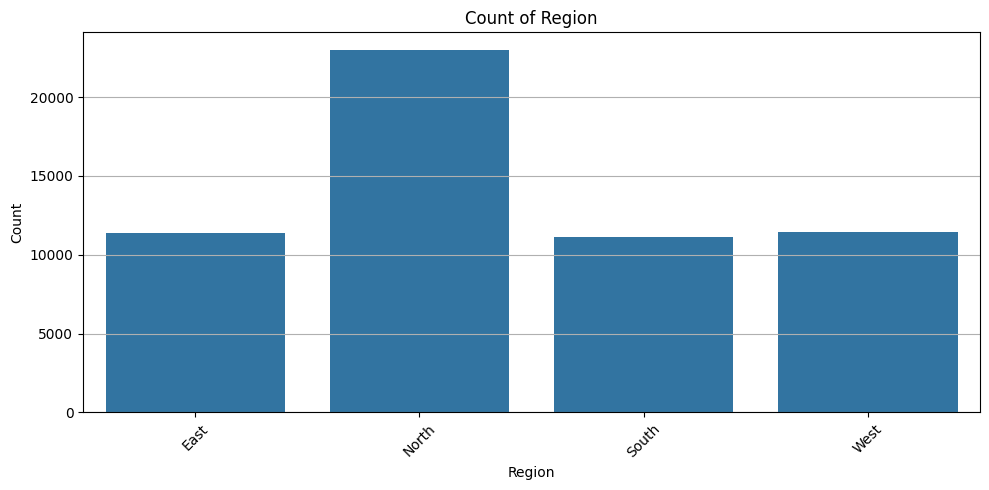

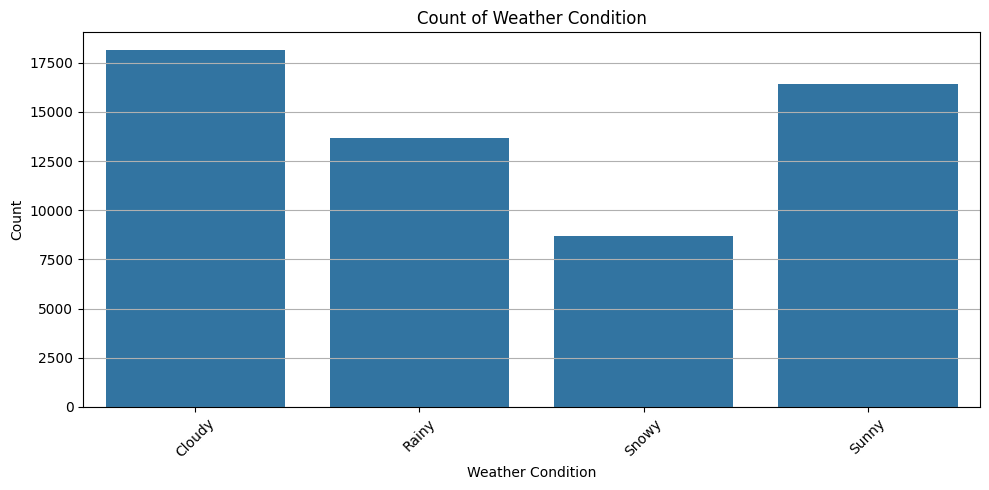

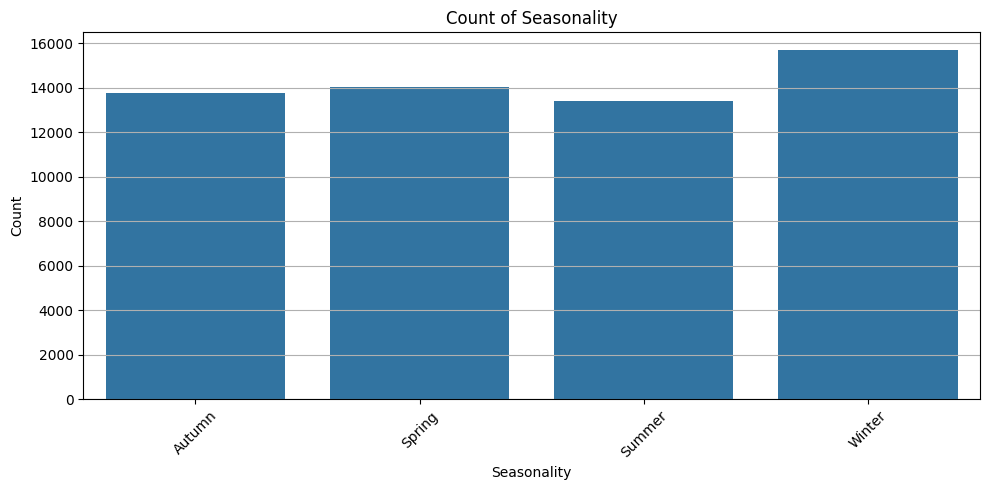

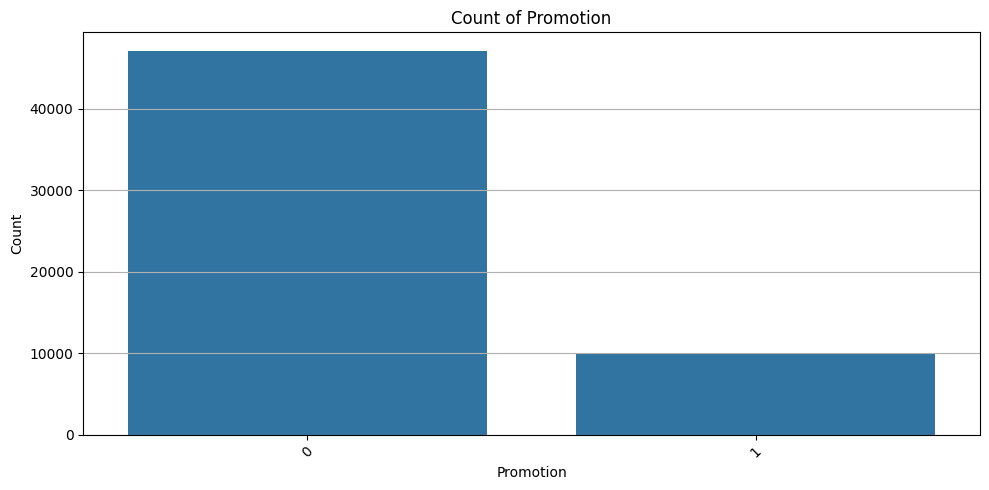

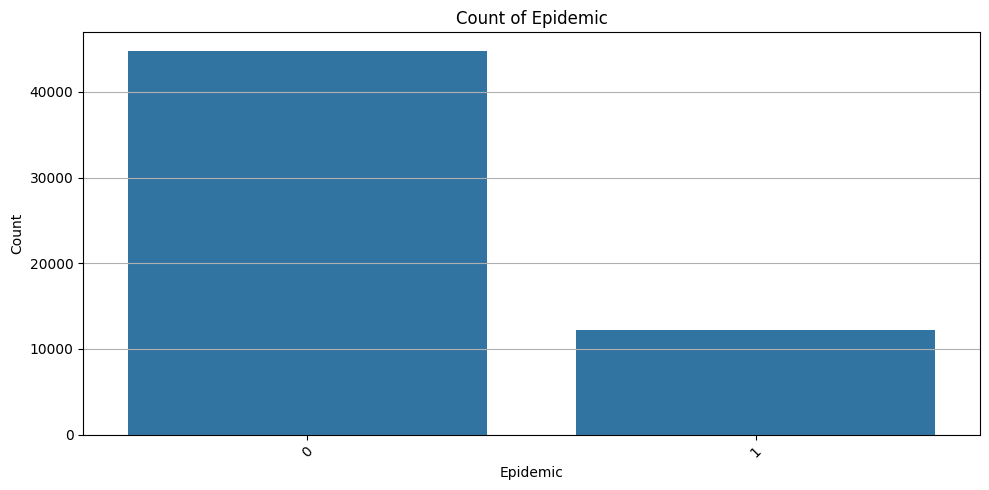

In [ ]:
categorical_features = ['Category', 'Region', 'Weather Condition', 'Seasonality', 'Promotion', 'Epidemic']

for col in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[col])
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

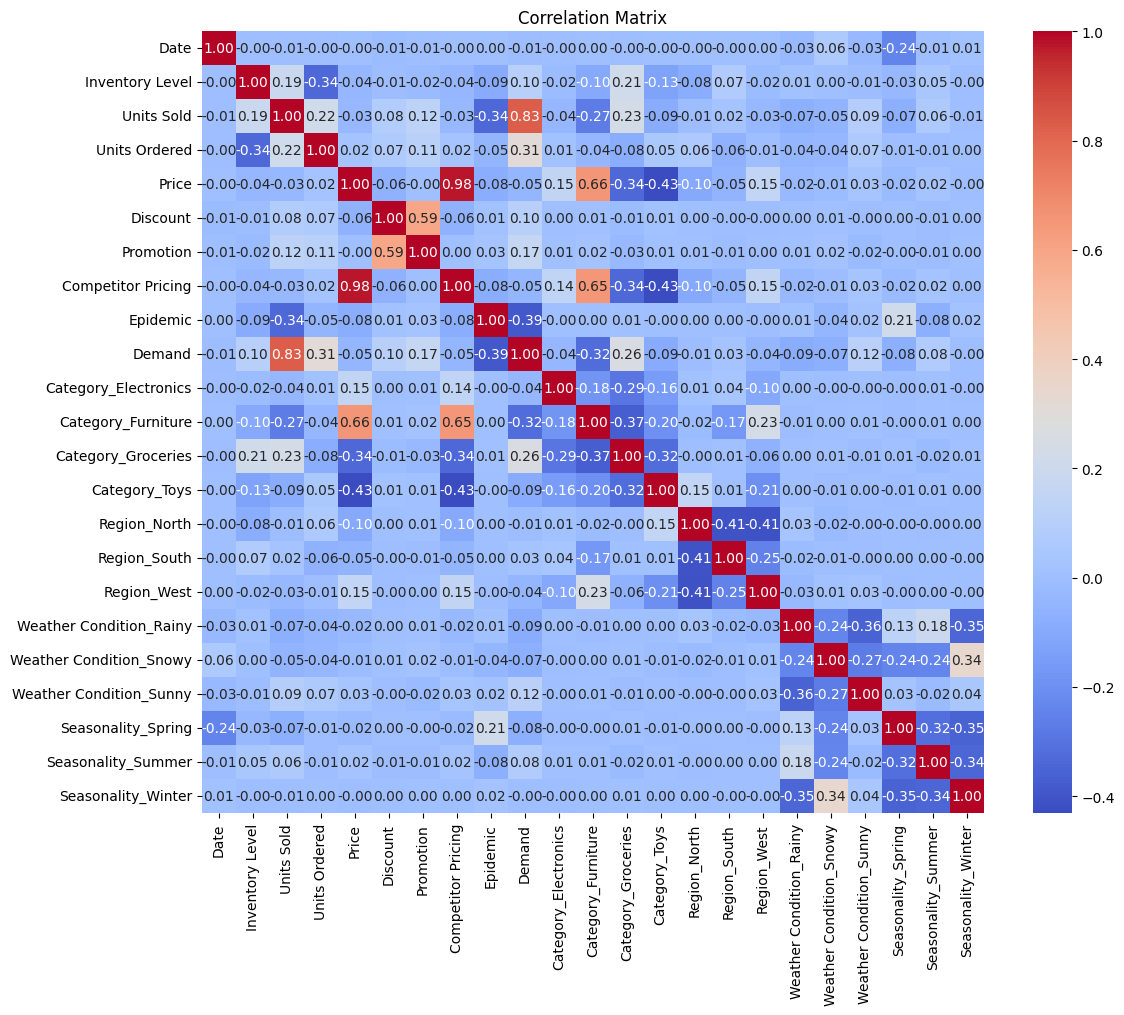

In [ ]:
plt.figure(figsize=(12, 10))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

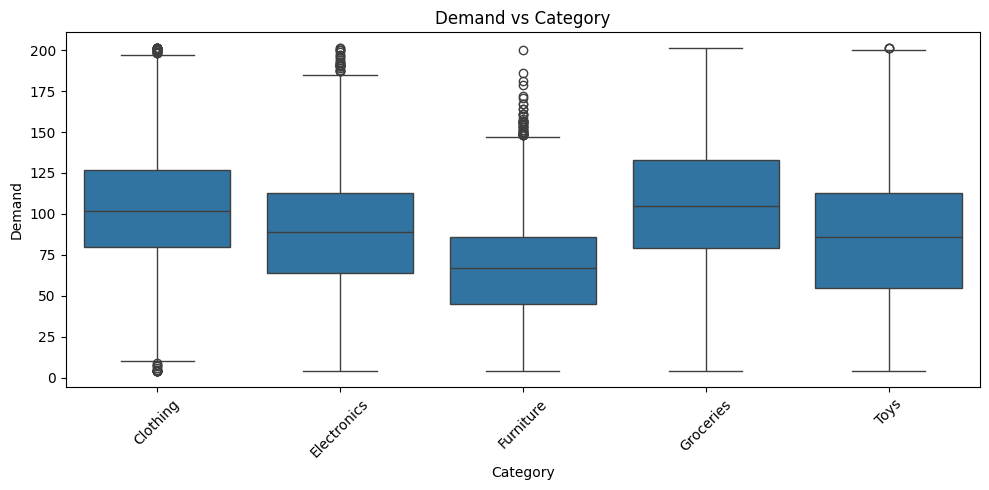

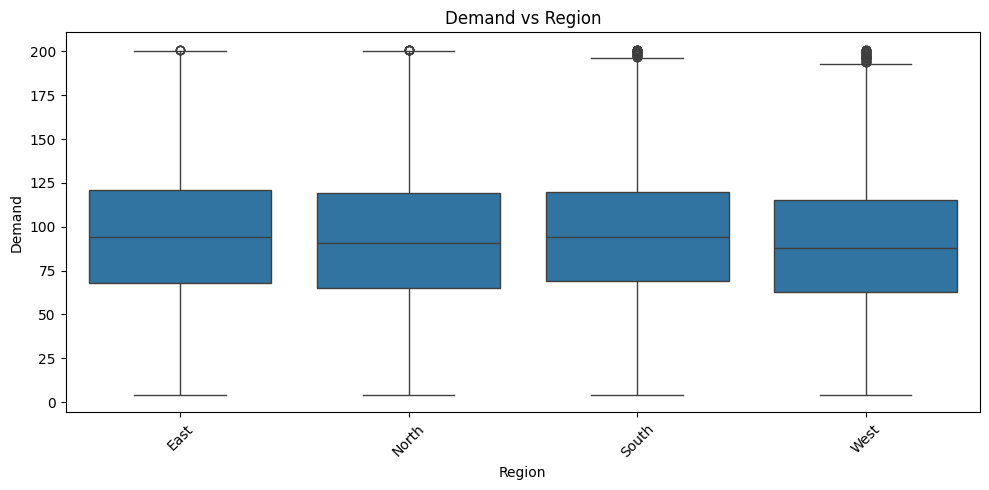

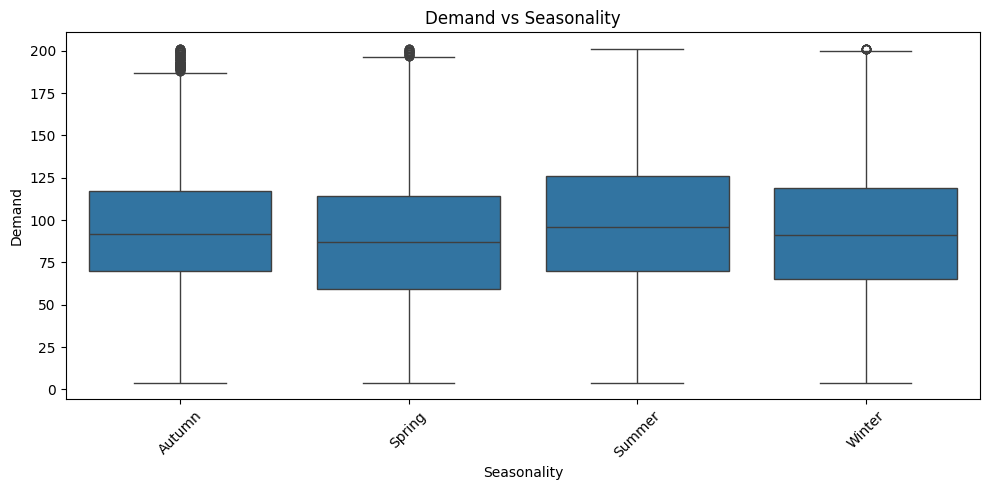

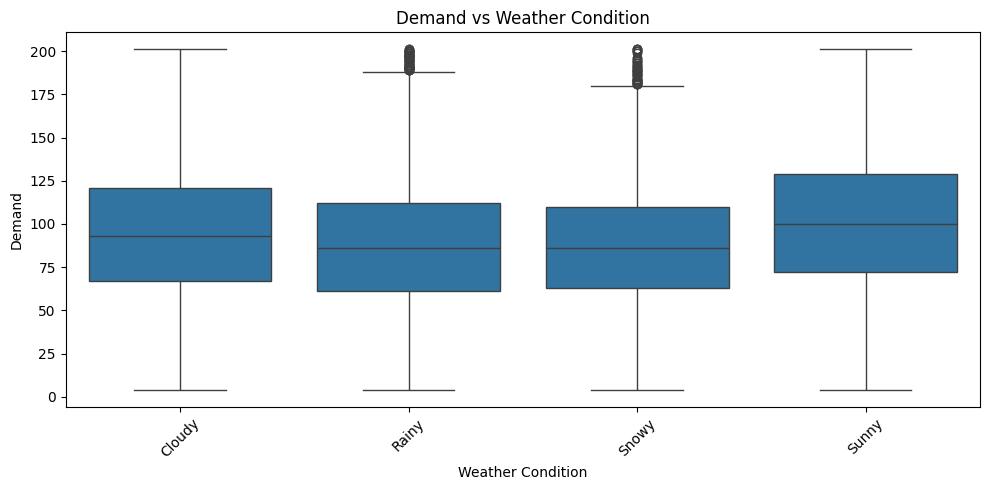

In [ ]:
for col in ['Category', 'Region', 'Seasonality', 'Weather Condition']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col], y=df['Demand'])
    plt.title(f"Demand vs {col}")
    plt.xlabel(col)
    plt.ylabel("Demand")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [15]:
X_for_vif = df_encoded.drop(columns=["Demand"])

if 'Date' in X_for_vif.columns:
    X_for_vif = X_for_vif.drop(columns=["Date"])

X_vif_ready = X_for_vif.select_dtypes(include=['int64', 'float64']).astype(float)

X_vif_ready = add_constant(X_vif_ready)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif_ready.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_ready.values, i) for i in range(X_vif_ready.shape[1])]
vif_data = vif_data[vif_data["Feature"] != "const"]

print("\n VIF Scores (Multicollinearity Check):")
print(vif_data.sort_values(by="VIF", ascending=False))


 VIF Scores (Multicollinearity Check):
              Feature        VIF
4               Price  21.518513
7  Competitor Pricing  21.509167
6           Promotion   1.574549
5            Discount   1.551707
2          Units Sold   1.291749
3       Units Ordered   1.252607
1     Inventory Level   1.231836
8            Epidemic   1.147806


In [16]:
df['Sold_Percent'] = df['Units Sold'] / (df['Units Ordered'] + 1e-5)  # To avoid division by zero
df['Revenue'] = df['Units Sold'] * df['Price']
df['Is_Discounted'] = np.where(df['Discount'] > 0, 1, 0)
df['Stock_Change'] = df['Inventory Level'] - df['Units Sold']

In [17]:
df_encoded = pd.get_dummies(df.drop(columns=["Date"]), drop_first=True)

X = df_encoded.drop(columns=["Demand"])
y = df_encoded['Demand']

model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=537, n_jobs=-1)
model.fit(X, y)

importances = model.feature_importances_
indices = np.argsort(importances)[-10:]
top_features = X.columns[indices]

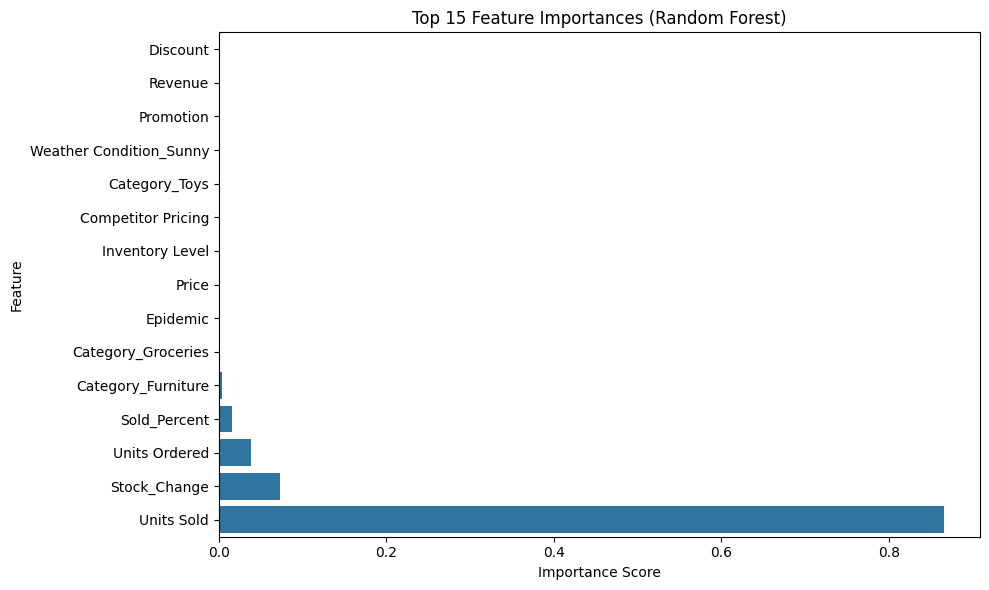

In [18]:
model.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)[-15:]

plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances (Random Forest)")
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [19]:
X_selected = X[top_features]
y_selected = y

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_selected, test_size=0.25, random_state=537
)
print(" Train shape:", X_train.shape)
print(" Test shape:", X_test.shape)

 Train shape: (42689, 10)
 Test shape: (14230, 10)


In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)


rf = RandomForestRegressor(n_estimators=100, random_state=537, n_jobs=1)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)


xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=537, n_jobs=1)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

In [23]:
def evaluate(name, y_true, y_pred):
    def mape(y_true, y_pred, eps=1e-8):
        denom = np.where(np.abs(y_true) < eps, eps, np.abs(y_true))
        return np.mean(np.abs((y_true - y_pred)/denom))*100.0

    print(f"\n {name}")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("MAPE :", mape(y_true, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R²  :", r2_score(y_true, y_pred))
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.4)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name} | Actual vs Predicted")
    plt.tight_layout()
    plt.show()


 Linear Regression
MAE : 14.61359401148085
MAPE : 18.96446713778643
MSE: 375.0433842675731
R²  : 0.7434000592106204


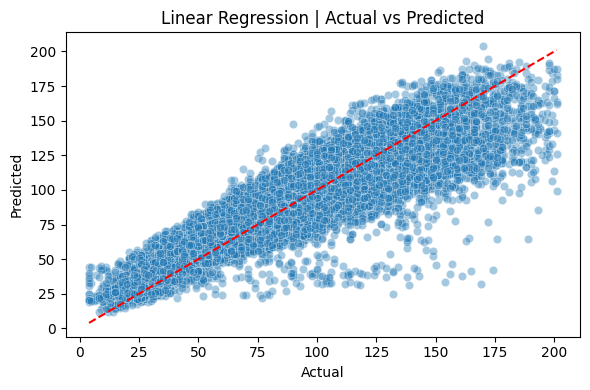


 Random Forest
MAE : 11.804160224877021
MAPE : 13.725098203517305
MSE: 243.13254105411104
R²  : 0.8336517900181223


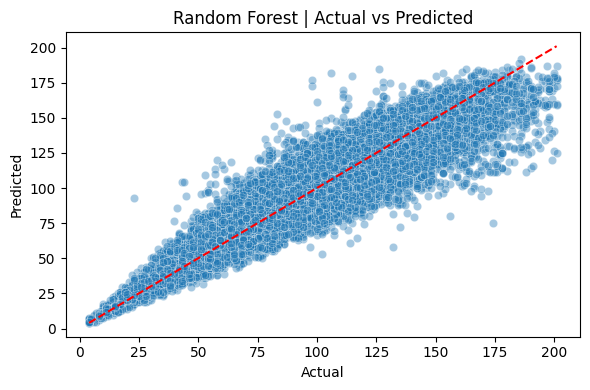


 XGBoost
MAE : 11.645120653064001
MAPE : 13.704520718493846
MSE: 226.88668298483228
R²  : 0.8447670006671267


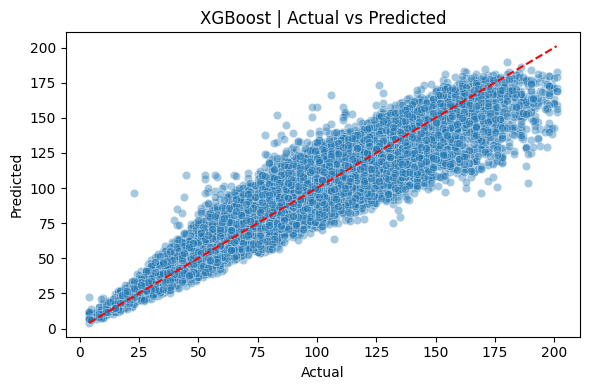

In [24]:
evaluate("Linear Regression", y_test, y_pred_lr)
evaluate("Random Forest", y_test, y_pred_rf)
evaluate("XGBoost", y_test, y_pred_xgb)

R²-based ensemble weights
--------------------------------
XGBoost         : 0.3488 (34.88%)
Random Forest   : 0.3442 (34.42%)
Linear Regression: 0.3070 (30.70%)

Hybrid model performance (test set)
------------------------------------
MAE : 11.8886
RMSE: 15.4506
R²  : 0.8367


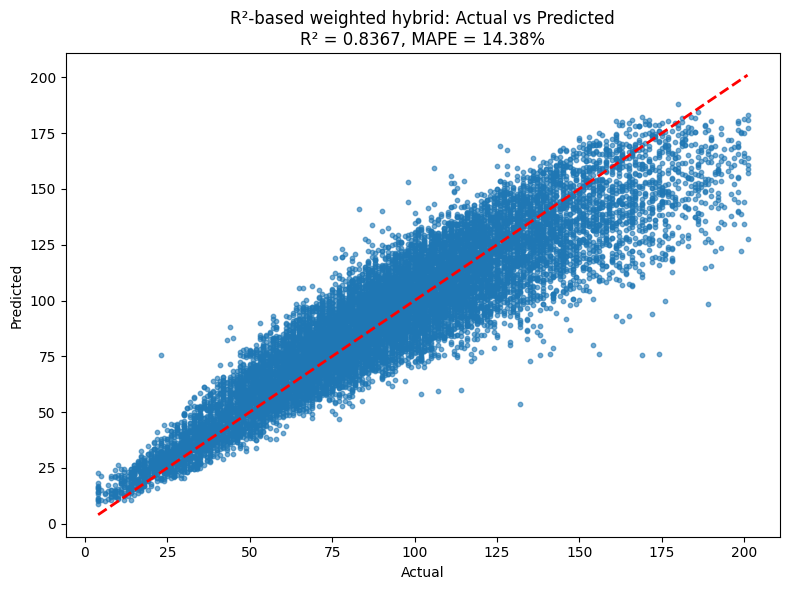

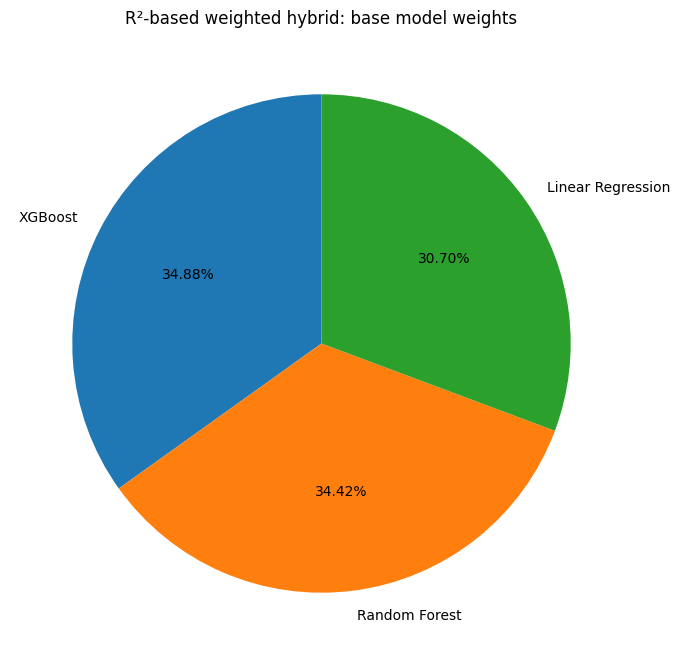

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


base_predictions = {
    "Linear Regression": y_pred_lr,
    "Random Forest":     y_pred_rf,
    "XGBoost":           y_pred_xgb,
}

r2_scores = {name: r2_score(y_test, pred) for name, pred in base_predictions.items()}
r2_pos = {k: max(v, 0.0) for k, v in r2_scores.items()}
total = sum(r2_pos.values())
if total > 0:
    weights = {k: v / total for k, v in r2_pos.items()}
else:

    n = len(base_predictions)
    weights = {k: 1.0 / n for k in base_predictions}

def weighted_ensemble_predict(preds: dict, w: dict) -> np.ndarray:
    names = list(preds.keys())
    out = np.zeros_like(preds[names[0]], dtype=float)
    for name in names:
        out += w[name] * preds[name]
    return out

y_pred_hybrid = weighted_ensemble_predict(base_predictions, weights)


def eval_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred) ** 0.5
    r2 = r2_score(y_true, y_pred)
    mask = y_true != 0
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100 if np.any(mask) \
           else np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
    return mae, rmse, r2, mape

mae, rmse, r2, mape = eval_metrics(y_test, y_pred_hybrid)


print("R²-based ensemble weights")
print("-" * 32)
for name in ["XGBoost", "Random Forest", "Linear Regression"]:
    w = weights[name]
    print(f"{name:16s}: {w:.4f} ({w*100:.2f}%)")

print("\nHybrid model performance (test set)")
print("-" * 36)
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²  : {r2:.4f}")



plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_hybrid, s=10, alpha=0.6)

mn, mx = float(np.min(y_test)), float(np.max(y_test))

plt.plot([mn, mx], [mn, mx], linestyle="--", color="red", linewidth=2)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"R²-based weighted hybrid: Actual vs Predicted\nR² = {r2:.4f}, MAPE = {mape:.2f}%")
plt.tight_layout()

plt.show()

plt.figure(figsize=(7, 7))
labels = ["XGBoost", "Random Forest", "Linear Regression"]
sizes = [weights[l] for l in labels]
plt.pie(sizes, labels=labels, autopct="%1.2f%%", startangle=90)
plt.title("R²-based weighted hybrid: base model weights")
plt.tight_layout()


plt.show()


 LSTM Neural Network for Demand Forecasting
   LSTM input shapes:
   Training: (42689, 1, 10)
   Testing: (14230, 1, 10)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



 LSTM Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 64)          │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,289 (126.13 KB)

 Trainable params: 32,289 (126.13 KB)

 Non-trainable params: 0 (0.00 B)


 Training LSTM model...
Epoch 1/50
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - loss: 0.0443 - mae: 0.1542 - val_loss: 0.0108 - val_mae: 0.0788
Epoch 2/50
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0159 - mae: 0.0965 - val_loss: 0.0097 - val_mae: 0.0760
Epoch 3/50
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0139 - mae: 0.0912 - val_loss: 0.0091 - val_mae: 0.0734
Epoch 4/50
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0134 - mae: 0.0898 - val_loss: 0.0096 - val_mae: 0.0758
Epoch 5/50
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0128 - mae: 0.0880 - val_loss: 0.0091 - val_mae: 0.0739
Epoch 6/50
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0129 - mae: 0.0880 - val_loss: 0.0089 - val_mae: 0.0724
Epoch 7/50
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0126 - mae: 0.0873 - val_loss: 0.0086 - val_mae: 0.0725
Epoch 8/50
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0124 - mae: 0.0866 - val_loss: 0.0088 - val_mae: 0.0721
Epoch 9/50

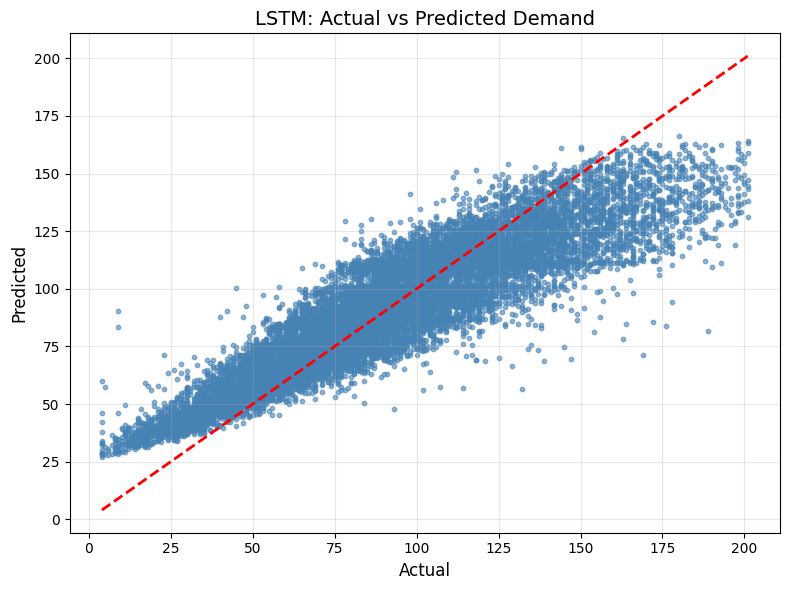

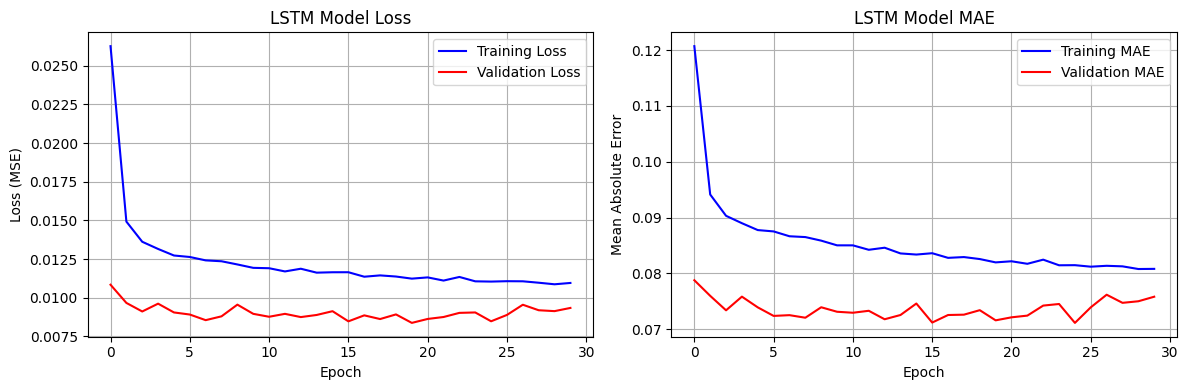

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

tf.random.set_seed(537)

def evaluate(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n--- {model_name} Evaluation ---")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    return {'MAE': mae, 'RMSE': rmse, 'R²': r2}


print("\n" + "="*50)
print(" LSTM Neural Network for Demand Forecasting")
print("="*50)


X_train_lstm = X_train_scaled.copy()
X_test_lstm = X_test_scaled.copy()
y_train_lstm = y_train.copy()
y_test_lstm = y_test.copy()

y_scaler = MinMaxScaler()
y_train_lstm_scaled = y_scaler.fit_transform(y_train_lstm.values.reshape(-1, 1)).flatten()
y_test_lstm_scaled = y_scaler.transform(y_test_lstm.values.reshape(-1, 1)).flatten()

X_train_lstm_reshaped = X_train_lstm.reshape((X_train_lstm.shape[0], 1, X_train_lstm.shape[1]))
X_test_lstm_reshaped = X_test_lstm.reshape((X_test_lstm.shape[0], 1, X_test_lstm.shape[1]))

print(f"   LSTM input shapes:")
print(f"   Training: {X_train_lstm_reshaped.shape}")
print(f"   Testing: {X_test_lstm_reshaped.shape}")

# Build LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape, dropout=0.2, recurrent_dropout=0.2),
        LSTM(32, return_sequences=False, dropout=0.2, recurrent_dropout=0.2),
        Dense(16, activation='relu'),
        Dropout(0.3),
        Dense(8, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='linear')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )

    return model

# Create and display model
lstm_model = create_lstm_model((X_train_lstm_reshaped.shape[1], X_train_lstm_reshaped.shape[2]))

print("\n LSTM Model Architecture:")
lstm_model.summary()

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Train the model
print("\n Training LSTM model...")
history = lstm_model.fit(
    X_train_lstm_reshaped, y_train_lstm_scaled,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Make predictions
y_pred_lstm_scaled = lstm_model.predict(X_test_lstm_reshaped, verbose=0)
y_pred_lstm = y_scaler.inverse_transform(y_pred_lstm_scaled).flatten()

# Evaluate LSTM model
lstm_results = evaluate("LSTM Neural Network", y_test, y_pred_lstm)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lstm, alpha=0.6, color='steelblue', s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title('LSTM: Actual vs Predicted Demand', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE', color='blue')
plt.plot(history.history['val_mae'], label='Validation MAE', color='red')
plt.title('LSTM Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()